In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
nigeria_exchangerate = pd.read_csv('/Users/carlsonoranu/Downloads/Stage 5 task data/Nigeria_Exchangerate.csv', delimiter=',', quotechar='"', thousands=',')
nigeria_inflationrate = pd.read_csv('/Users/carlsonoranu/Downloads/Stage 5 task data/Nigeria_Inflationrate.csv', delimiter=',', quotechar='"')
nigeria_m1moneysupply = pd.read_csv('/Users/carlsonoranu/Downloads/Stage 5 task data/Nigeria_M1moneysupply.csv', delimiter=',', quotechar='"', thousands=',')
nigeria_stockprice = pd.read_csv('/Users/carlsonoranu/Downloads/Stage 5 task data/Nigeria_Stockprice.csv', delimiter=',', quotechar='"', thousands=',')


In [3]:
print(nigeria_exchangerate.head())

      Date  Exchange_Rate
0  07/2024        1587.10
1  07/2024        1625.33
2  07/2024        1625.00
3  07/2024        1620.00
4  07/2024        1595.00


In [4]:
print(nigeria_inflationrate.head())

      Date  Inflation_Rate
0  01/2012            12.6
1  02/2012            11.9
2  03/2012            12.1
3  04/2012            12.9
4  05/2012            12.7


In [5]:
print(nigeria_m1moneysupply.head())

      Date   M1_Money_Supply 
0  01/2024        31555882.24
1  02/2024        30277249.26
2  03/2024        32489908.18
3  04/2024        33818990.81
4  05/2024        33382632.88


In [6]:
print(nigeria_stockprice.head())

      Date  NGX_Price
0  07/2024  100568.60
1  07/2024  100539.40
2  07/2024  100503.21
3  07/2024  100032.32
4  07/2024  100075.59


In [7]:
# Ensure numeric columns are properly converted
nigeria_exchangerate['Exchange_Rate'] = nigeria_exchangerate['Exchange_Rate'].astype(float)
nigeria_stockprice['NGX_Price'] = nigeria_stockprice['NGX_Price'].astype(float)
nigeria_m1moneysupply[' M1_Money_Supply '] = nigeria_m1moneysupply[' M1_Money_Supply '].astype(float)
nigeria_inflationrate['Inflation_Rate'] = nigeria_inflationrate['Inflation_Rate'].astype(float)

In [8]:
# Calculate monthly averages for Exchange Rate and NGX Price
average_exchangerate = nigeria_exchangerate.groupby('Date')['Exchange_Rate'].mean().reset_index()
average_stockprice = nigeria_stockprice.groupby('Date')['NGX_Price'].mean().reset_index()

In [9]:
# Merge dataframes
merged_df = pd.merge(average_exchangerate, nigeria_inflationrate, on='Date', how='inner')
merged_df = pd.merge(merged_df, nigeria_m1moneysupply, on='Date', how='inner')
merged_df = pd.merge(merged_df, average_stockprice, on='Date', how='inner')


In [10]:
# Convert the Date column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%Y')

# Sort the dataframe by Date in ascending order
merged_df = merged_df.sort_values(by='Date').reset_index(drop=True)


In [11]:
# Display merged dataframe
print(merged_df.head())

        Date  Exchange_Rate  Inflation_Rate   M1_Money_Supply      NGX_Price
0 2012-01-01     161.292045            12.6         6826905.39  20803.775000
1 2012-02-01     158.616905            11.9         6420603.05  20516.417500
2 2012-03-01     157.694773            12.1         6522940.37  20918.957273
3 2012-04-01     157.524286            12.9         6668824.43  21270.883158
4 2012-05-01     158.500435            12.7         6534503.57  22413.519048


In [12]:
# Save the sorted dataframe to a CSV file
#merged_df.to_csv('Sorted_Merged_Nigeria_Economic_Data.csv', index=False)

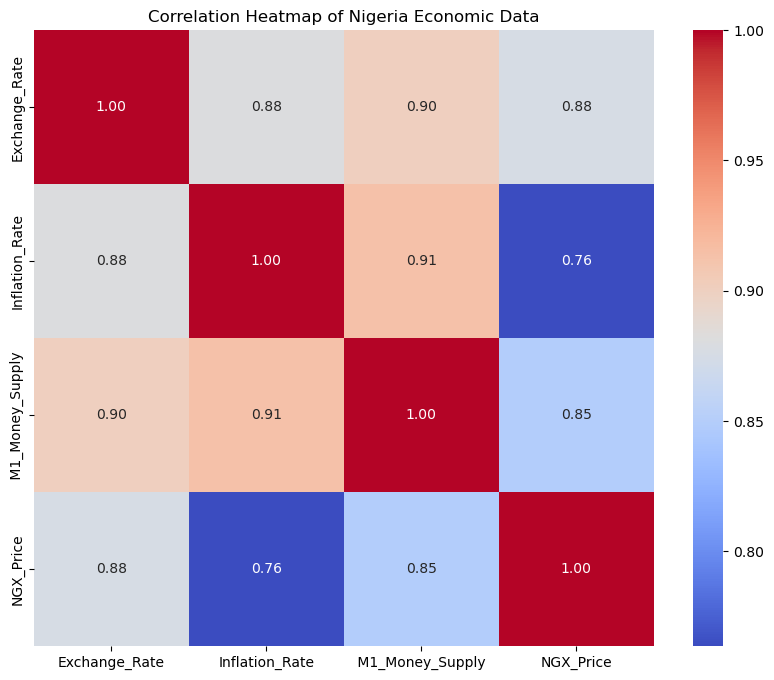

In [13]:
# Generate a correlation heatmap
correlation_matrix = merged_df.drop(columns=['Date']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Nigeria Economic Data')
plt.show()

In [14]:
# Display the correlation matrix as a DataFrame
correlation_df = pd.DataFrame(correlation_matrix)
print(correlation_df)

                   Exchange_Rate  Inflation_Rate   M1_Money_Supply   NGX_Price
Exchange_Rate           1.000000        0.880428           0.900956   0.875487
Inflation_Rate          0.880428        1.000000           0.913274   0.763485
 M1_Money_Supply        0.900956        0.913274           1.000000   0.849327
NGX_Price               0.875487        0.763485           0.849327   1.000000


In [15]:
# Normalize the variables
scaler = MinMaxScaler()

merged_df[['Exchange_Rate', 'Inflation_Rate', ' M1_Money_Supply ', 'NGX_Price']] = A
A = scaler.fit_transform(merged_df[['Exchange_Rate', 'Inflation_Rate', ' M1_Money_Supply ', 'NGX_Price']])

In [16]:
merged_df['Productivity'] = (
    merged_df['Exchange_Rate'] * -0.5 +
    merged_df['Inflation_Rate'] * -0.3 +
    merged_df[' M1_Money_Supply '] * 0.1 +
    merged_df['NGX_Price'] * 0.5
)

In [17]:

# Display the updated DataFrame with the productivity column
print(merged_df.head())

        Date  Exchange_Rate  Inflation_Rate   M1_Money_Supply   NGX_Price  \
0 2012-01-01       0.003260        0.186667           0.021126   0.003492   
1 2012-02-01       0.001296        0.160000           0.006392   0.000000   
2 2012-03-01       0.000619        0.167619           0.010103   0.004891   
3 2012-04-01       0.000494        0.198095           0.015393   0.009168   
4 2012-05-01       0.001210        0.190476           0.010522   0.023053   

   Productivity  
0     -0.053771  
1     -0.048009  
2     -0.047139  
3     -0.053552  
4     -0.045169  


In [18]:
# Save the updated DataFrame to a CSV file
merged_df.to_csv('Productivity_Merged_Nigeria_Economic_Data.csv', index=False)

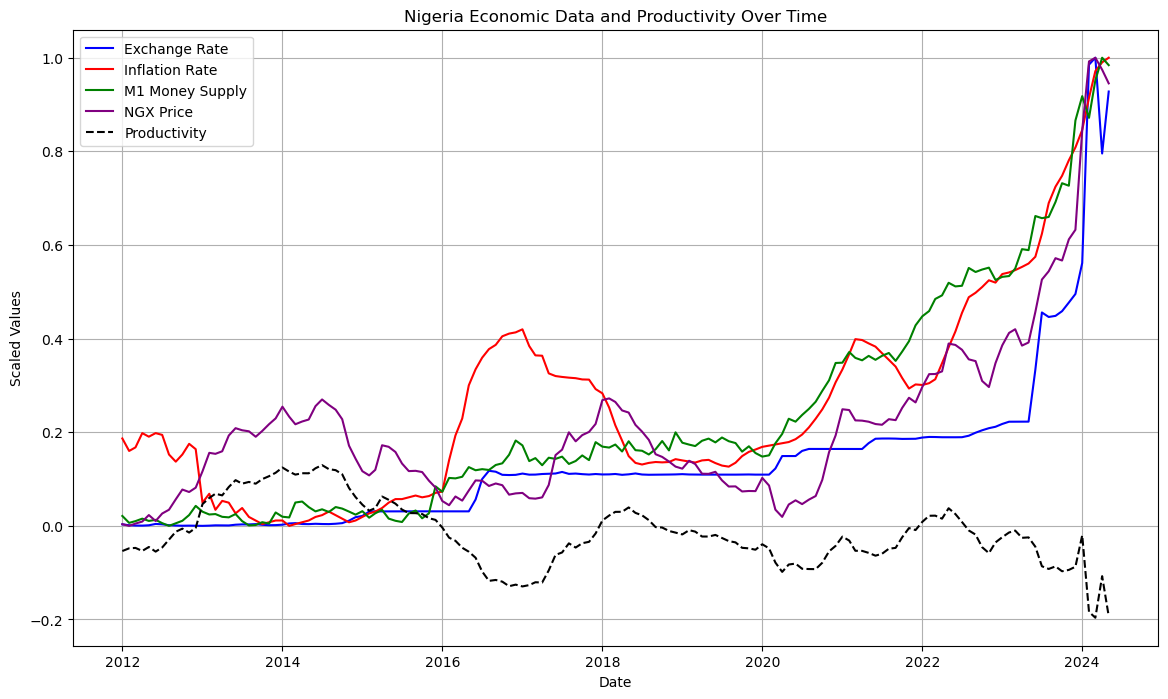

In [19]:
# Plot all variables including productivity over time
plt.figure(figsize=(14, 8))
plt.plot(merged_df['Date'], merged_df['Exchange_Rate'], label='Exchange Rate', color='blue')
plt.plot(merged_df['Date'], merged_df['Inflation_Rate'], label='Inflation Rate', color='red')
plt.plot(merged_df['Date'], merged_df[' M1_Money_Supply '], label='M1 Money Supply', color='green')
plt.plot(merged_df['Date'], merged_df['NGX_Price'], label='NGX Price', color='purple')
plt.plot(merged_df['Date'], merged_df['Productivity'], label='Productivity', color='black', linestyle='--')

plt.title('Nigeria Economic Data and Productivity Over Time')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()